In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the data set
data=pd.read_csv('data/train.csv')
data 

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


In [3]:
#display all the type of the data
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                          7

In [4]:
#data sahpe of the data 
data.shape

(700000, 26)

In [5]:
data.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#is to display coloums types 
data.dtypes

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                    str
ethnicity                                 str
education_level                           str
income_level                              str
smoking_status                            str
employment_status                 

In [7]:
data.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='str')

In [8]:
#check the data have missing value
data.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [9]:
id=data['id']
id

0              0
1              1
2              2
3              3
4              4
           ...  
699995    699995
699996    699996
699997    699997
699998    699998
699999    699999
Name: id, Length: 700000, dtype: int64

In [10]:
data=data.drop(['id'],axis=1)
data

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


In [11]:
print(data['diagnosed_diabetes'].value_counts())
print(f'the differnce is that {436307-263693}')

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64
the differnce is that 172614


<Axes: xlabel='diagnosed_diabetes', ylabel='count'>

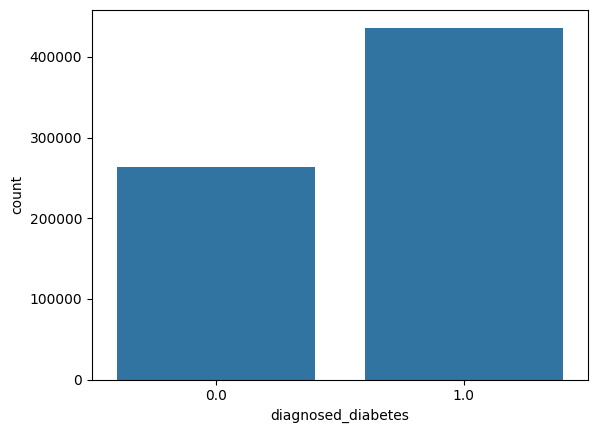

In [12]:
sns.countplot(x='diagnosed_diabetes',data =data)# there is an imbalance in model


In [13]:
from sklearn.utils import resample

In [14]:
df_majority =data[data['diagnosed_diabetes']==1]

In [15]:
df_minority = data[data['diagnosed_diabetes']==0]

In [16]:
df_minority_upsampling = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=0)

In [17]:
data_train_balanced=pd.concat([df_majority,df_minority_upsampling])

In [18]:
data_train_balanced['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1.0    436307
0.0    436307
Name: count, dtype: int64

In [19]:
data_train_balanced

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
6,41,2,148,3.4,5.6,3.7,27.9,0.89,130,77,...,Female,White,Graduate,Lower-Middle,Current,Employed,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54960,21,3,107,2.5,6.9,4.9,25.8,0.87,102,73,...,Female,White,Highschool,Middle,Never,Unemployed,0,0,0,0.0
237337,77,1,68,6.0,7.1,3.0,28.2,0.93,137,83,...,Female,Hispanic,Graduate,Middle,Never,Retired,0,1,0,0.0
125051,37,2,88,7.6,6.7,5.4,23.9,0.88,120,61,...,Male,Black,Graduate,Middle,Never,Employed,0,0,0,0.0
273979,36,1,198,4.7,5.4,4.6,26.1,0.84,123,71,...,Male,White,Highschool,Lower-Middle,Never,Employed,0,0,0,0.0


In [20]:
data_train_balanced['gender'].unique()

<StringArray>
['Female', 'Male', 'Other']
Length: 3, dtype: str

In [21]:
data_train_balanced.dtypes

age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                    str
ethnicity                                 str
education_level                           str
income_level                              str
smoking_status                            str
employment_status                         str
family_history_diabetes           

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoder =LabelEncoder()
data_train_balanced['gender'] = label_encoder.fit_transform(data_train_balanced['gender'])
data_train_balanced['ethnicity'] = label_encoder.fit_transform(data_train_balanced['ethnicity'])
data_train_balanced['education_level'] = label_encoder.fit_transform(data_train_balanced['education_level'])
data_train_balanced['income_level'] = label_encoder.fit_transform(data_train_balanced['income_level'])
data_train_balanced['smoking_status'] = label_encoder.fit_transform(data_train_balanced['smoking_status'])
data_train_balanced['employment_status'] = label_encoder.fit_transform(data_train_balanced['employment_status'])


In [24]:
data_train_balanced['smoking_status'].unique()

array([0, 2, 1])